# Project: Investigate a Dataset (NOSHOW APPOINTMENTS)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> In this dataset I would be analyzing an information which is focused on whether or not patients show up for their appointments. This would help to a great deal to understand the factors surrounding the absence or presence of patients for a Doctors Appointment.The dataset has over 110,527 rows and 14 columns. Kindly find below the Dictionary showing the dataset definitions.

> **Data Dictionary** <br> <br>
1.PatientId         -This is the Identification number used to uniquely identify a patient. <br> <br>
2.AppointmentID     -Identification of each appointment. <br> <br>
3.Gender	        -This shows if the patient is either male or female. <br> <br>
4.ScheduledDay	    -This is the day the patient called to schedule the appointment. <br> <br>
5.AppointmentDay	-This is the day of the actual appointment. <br> <br>
6.Age	            -This is the age of the patient <br> <br>
7.Neighbourhood	    -This is the area where the patient lives <br> <br>
8.Scholarship	    -This is to know if the patient is part of the Brazillian social welfare program. True(1) or False(0) <br> <br>
9.Hypertension	    -Does the patient have hypertension. True(1) or False(0) <br> <br>
10.Diabetes	        -Does the patient have diabetes. True(1) or False(0) <br> <br>
11.Alcoholism	    -Does the patient have Alcoholism. True(1) or False(0) <br> <br>
12.Handcap	        -Does the patient have handcap . True(1) or False(0) <br> <br>
13.SMS_received	    -At least one or more messages was sent to the patient. <br> <br>
14.No-show          -Did the patient show up for the appointment. Yes or No <br> <br>

> **QUESTIONS FOR ANALYSIS** <br><br>
1.  Do we have more patients on some days of the week.<br> <br>
2.  Which gender is more likely to meet their appointment schedules <br> <br>
3.  What is the age distribution of patients for the Noshow appointment <br> <br>
4.  How does the waiting period affect the No Show appointment<br> <br>
5.  Does the availability of a scholarship affect the No Show appointment<br> <br>
  



In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# This is to load the Noshow appointments data
df=pd.read_csv(r"C:\Users\Ajose\Desktop\PYTHON PROJECT\Dataset to to be Analyzed\noshowappointments-kagglev2-may-2016.csv")

In [3]:
# This is to view the data and check its properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


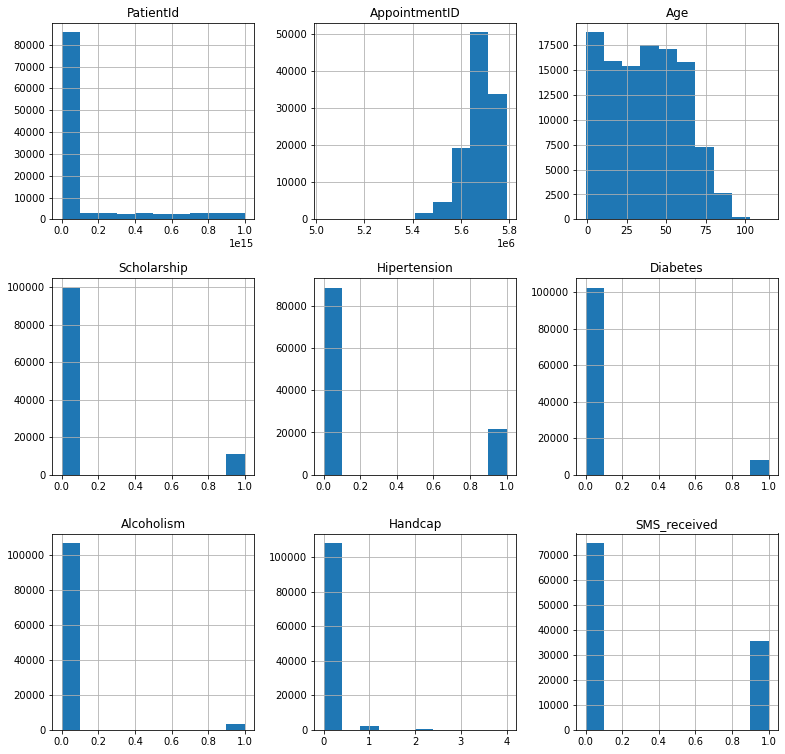

In [4]:
# This is to check the distribution of the data
df.hist(figsize = (13,13));

In [5]:
# This is meant to check the information about the data
df.info()
# By observation we can see that the some of the columns are not well named
# Also the data type for scheduled day and appointment day ought to be date time and not object
# Its also important to note that there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# This is meant to check the current shape of the data
df.shape
# we can see that the dataset has 110,527 rows and `14 columns

(110527, 14)

In [7]:
# This is also meant to check the details of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
# To check for null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

We can see that there are no null values

In [9]:
# To check for duplicate values 
sum(df.duplicated())


0

The dataset has no duplicated values

In [10]:
# This is used to check the number of unique values in a dataset.
df.nunique()


PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

We can see from data set that some patients have had multiple appointments while the patient id has 62,999 unique rows<br>  
Also we can see that we have 81 unique neighbourhoods and 27 appointment days.<br> <br>
It can also be observed that some of the columns are not well named.<br>

### Data Cleaning (The Data cleaning steps are listed below)
1. CONVERSION OF DATA TYPES TO THE CORRECT FORMAT
2. CHANGING OF COLUMN NAMES
3. CHANGING THE COLUMN VALUES
4. REMOVING NEGATIVE VALUES FROM THE AGE COLUMN

> **CONVERSION OF DATA TYPES TO THE CORRECT FORMAT**

In [11]:
# CONVERSION OF DATA TYPES TO THE CORRECT FORMAT
# The Scheduled Day and Appointment Day's datatype need to be converted to date time

columns = ['ScheduledDay','AppointmentDay']
for col in columns:
    df[col]=(pd.to_datetime(df[col]).dt.date)

## To check if the changes took effect   
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No


> **CHANGING THE COLUMN NAMES**

In [12]:
# Checking the column names to see the ones that requires adjustment
df.info()

# Using the rename function to edit the column names that requires adjustment
df=df.rename(columns={'PatientId':'Patient_ID','AppointmentID':'Appointment_ID','ScheduledDay':'Scheduled_Day','AppointmentDay':'Appointment_Day','Hipertension':'Hypertension','No-show':'No_Show','Handcap':'Handicap'})

## To check if the change took effect
df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


> **CHANGING THE COLUMN VALUES OF THE NO SHOW COLUMN**

In [13]:
## This is to change the column values of the No_show columns to 1 or 0 where we find Yes or No
# we can check the number of Yes and Nos in the columns before conversion
df.No_Show.value_counts()


No     88208
Yes    22319
Name: No_Show, dtype: int64

In [14]:
# using numpy function to convert it
df.No_Show=np.where(df.No_Show =='Yes',1,0)

## This is to confirm the changes that were made
df.No_Show.value_counts()
df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [15]:
# To make analysis easier i would convert the ailments column to yes or no instead of 0 and 1
#Diabetes column
df.Diabetes=np.where(df.Diabetes ==1,'Yes','No')

#Handicap Column
df.Handicap=np.where(df.Handicap ==1,'Yes','No')

#Hypertension column
df.Hypertension=np.where(df.Hypertension ==1,'Yes','No')

#Alcholism column
df.Alcoholism=np.where(df.Alcoholism ==1,'Yes','No')



No     102584
Yes      7943
Name: Diabetes, dtype: int64

> **REMOVING NEGATIVE VALUES FROM THE AGE COLUMN**

In [16]:
## To check for the wrong age in the data set
wrong_age=df.query('Age < 0')

## This is to drop the wrong age
df.drop(wrong_age.index, inplace =True)

In [17]:
## To check again if the wrong age is still there
df.query('Age < 0')

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show


<a id='eda'></a>
## Exploratory Data Analysis



> **DISTRIBUTION OF PATIENTS WHO SHOWED UP FOR THE DOCTORS APPOINTMENT AND THOSE WHO DIDNT**

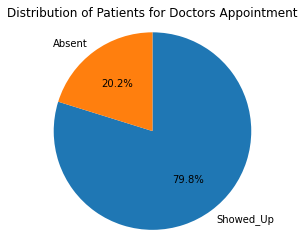

In [18]:
# A bar chart would be plotted to show the distribution of patients who showed up and those who didnt show up for the appointmen

# plot a pie chart
Count_of_patients = df.No_Show.value_counts()
plt.pie(Count_of_patients, labels = ['Showed_Up', 'Absent'], startangle = 90,
        counterclock = False, autopct='%1.1f%%');
plt.axis('square')
plt.title('Distribution of Patients for Doctors Appointment');

> **This means that 79.8% of patients showed up for their Doctor's Appointment which is a very good number**. 


Text(0.5, 1.0, 'Distribution of Patients for the Doctors Appointment')

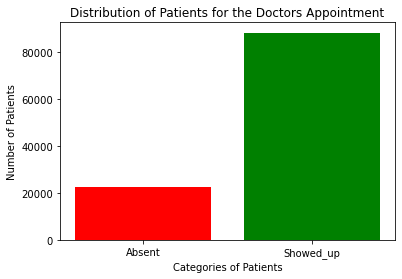

In [19]:
# Creating a mask for the No show appointment 
Absent=(df['No_Show'] ==1).sum()
Showed_up=(df['No_Show'] ==0).sum()

# Using a bar chart to represent the distribution
colors=['red','green']
left = [0,1]
height=[Absent,Showed_up]
tick_label=['Absent','Showed_up']
plt.bar(left,height, tick_label=tick_label,color=colors, width=0.8);
plt.xlabel('Categories of Patients')
plt.ylabel('Number of Patients')
plt.title('Distribution of Patients for the Doctors Appointment')

>> **The distribution above also reinforces the fact that most of the patients showed up for their Doctors appointment. The next question would likely be ,What are the major factors that affect this number?****

 **Distribution of Patients by Gender**

Text(0.5, 1.0, 'Distribution of Patients By Gender')

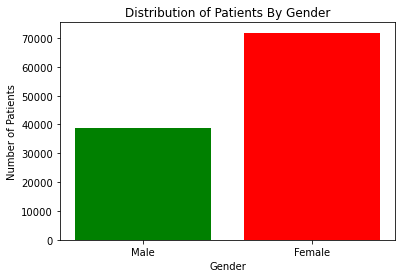

In [20]:
# Using a bar chart to represent the distribution 
Male=(df['Gender'] =='M').sum()
Female=(df['Gender'] =='F').sum()
colors=['green','red']
left = [0,1]
height=[Male,Female]
tick_label=['Male','Female']
plt.bar(left,height, tick_label=tick_label,color=colors, width=0.8);
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.title('Distribution of Patients By Gender')


>> **We have a higher number of female patients**

**Creation of the Age group Column**

In [21]:
## To create different age groups
df['Age'].describe()


count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [22]:
# Using the values as a distribution for the age
#bin edges would be used to cut the data into groups
# Bin edges that will be used to "cut" the data into groups
bin_edges = [-1 ,18 ,37 ,55 ,115 ]
bin_edges

[-1, 18, 37, 55, 115]

In [23]:
# bin labels for the four different groups
bin_names=['0-18','19-37','38-55','56 and above']
bin_names
df['Age_group']=pd.cut(df['Age'],bin_edges,labels=bin_names)

# To confirm the changes
Age_group=df['Age_group']
df.Age_group.value_counts()

0-18            28866
56 and above    27504
19-37           27250
38-55           26906
Name: Age_group, dtype: int64

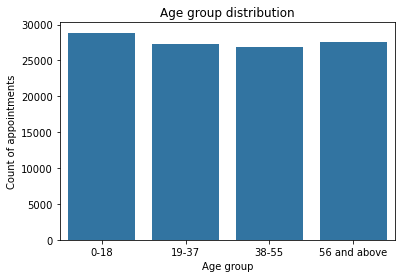

In [47]:
# Creating  count plot def function for the graphs to enable reusability of code
def count_plot(dfdata, xdata, fxlabel, fylabel, ftitle, fcolor, fpalette=None):
    f = sns.countplot(data = dfdata, x = xdata, color = fcolor, palette= fpalette)
    plt.title(ftitle)
    plt.xlabel(fxlabel)
    plt.ylabel(fylabel)
    return f

# plotting the graph for the Age_group column
count_plot(df, 'Age_group', 'Age group', 'Count of appointments', 'Age group distribution', sns.color_palette()[0])
plt.show()



> >**This shows to a great deal that the highest number of patients are under 18 years while the least number of patients are between 38 and 55 years**

 **Scholarship Column**

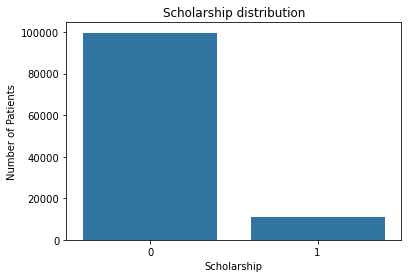

In [25]:
# plotting the graph for the Scholarship column
count_plot(df, 'Scholarship', 'Scholarship', 'Number of Patients', 'Scholarship distribution', sns.color_palette()[0])
plt.show()


>> **A HIGHER NUMBER OF THE PATIENTS DONT HAVE SCHOLARSHIPS**

**Representation of the various ailments in a bar chart**

**Diabetes Patients**

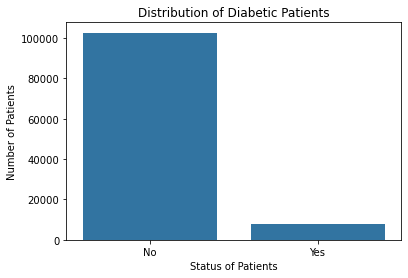

In [48]:
# plotting the graph for the Diabetes column
count_plot(df, 'Diabetes', 'Status of Patients', 'Number of Patients', 'Distribution of Diabetic Patients', sns.color_palette()[0])
plt.show()

**Alcoholism Patients**

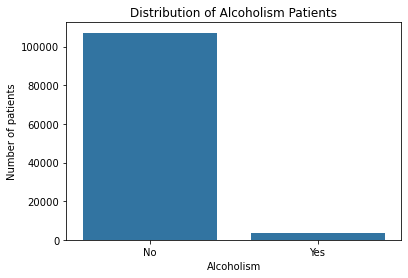

In [49]:
# plotting the graph for the Alcoholism column
count_plot(df, 'Alcoholism', 'Alcoholism', 'Number of patients', 'Distribution of Alcoholism Patients', sns.color_palette("tab10")[0])
plt.show()

**Handicapped patients**

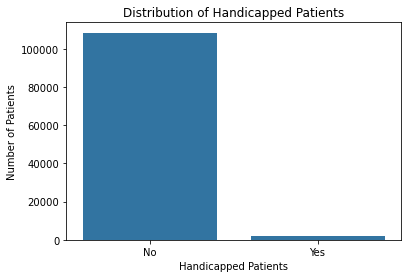

In [50]:
# plotting the graph for the Handicapped Patients column
count_plot(df, 'Handicap', 'Handicapped Patients', 'Number of Patients', 'Distribution of Handicapped Patients', sns.color_palette("tab10")[0])
plt.show()

**Hypertensive Patients**

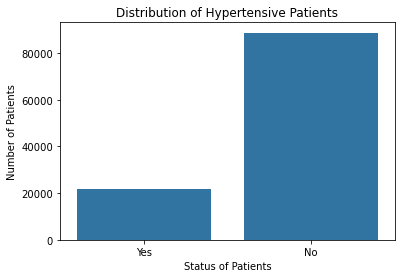

In [29]:
# plotting the graph for the Hypertensive Patients column
count_plot(df, 'Hypertension', 'Status of Patients', 'Number of Patients', 'Distribution of Hypertensive Patients', sns.color_palette("tab10")[0])
plt.show()

>>**The summary of this is that a large percentage of the patients dont have any of the four listed ailments**

**ADDITIONAL COLUMNS FOR THE ANALYSIS**

In [30]:
# we can create a delay_period column that shows the difference between the scheduled days and the appointment days
df['delay_period']=(df['Appointment_Day']-df['Scheduled_Day']).dt.days

# We can check the new column.
df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,Age_group,delay_period
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,Yes,No,No,No,0,0,56 and above,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,No,No,No,No,0,0,56 and above,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,No,No,No,No,0,0,56 and above,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,No,No,No,No,0,0,0-18,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,Yes,Yes,No,No,0,0,56 and above,0


In [31]:
## To check for the wrong age in the data set.( some negative values were found and this not )
wrong_day=df.query('delay_period < 0')
wrong_day
## This is to drop the wrong appointment day
df.drop(wrong_day.index, inplace =True)
df['delay_period'].describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: delay_period, dtype: float64

**WE can classify the delay period into four different categories**

In [32]:
# Using the describe function to get the different categories of the days 
df['delay_period'].describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: delay_period, dtype: float64

In [33]:
# Using the values as a distribution for the days
# Bin edges that will be used to "cut" the data into groups
bin_edges = [-1,0 ,4 ,15 ,179]
bin_edges
df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,Age_group,delay_period
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,Yes,No,No,No,0,0,56 and above,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,No,No,No,No,0,0,56 and above,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,No,No,No,No,0,0,56 and above,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,No,No,No,No,0,0,0-18,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,Yes,Yes,No,No,0,0,56 and above,0


In [34]:
# labels for the four delay period groups
bin_names = ['0 days','1-4 days','5-15 days','16 days and above']
Delayed_period_category = pd.cut(df['delay_period'], bin_edges, labels=bin_names)

# To insert the new column in data set
df.insert(5,'Delayed_period_category',Delayed_period_category)

In [35]:
## to check for the new data
df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Delayed_period_category,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,Age_group,delay_period
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,0 days,62,JARDIM DA PENHA,0,Yes,No,No,No,0,0,56 and above,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,0 days,56,JARDIM DA PENHA,0,No,No,No,No,0,0,56 and above,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,0 days,62,MATA DA PRAIA,0,No,No,No,No,0,0,56 and above,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,0 days,8,PONTAL DE CAMBURI,0,No,No,No,No,0,0,0-18,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,0 days,56,JARDIM DA PENHA,0,Yes,Yes,No,No,0,0,56 and above,0


**Create the weekday column**

In [36]:
import datetime
# Convert the datatype of the Appointment Day to date time
df['Appointment_Day']=pd.to_datetime(df['Appointment_Day'])

#https://datascientyst.com/convert-datetime-day-of-week-name-number-in-pandas/ 

In [37]:
# To extract the week day
day_of_week=df.Appointment_Day.dt.weekday

# To insert it in the table
df.insert(6,'day_of_week',day_of_week)

**Drop Unnecessary columns**

In [38]:
# This is to drop the columns that are not necessary
df.drop(['Patient_ID','Appointment_ID','Appointment_Day','Scheduled_Day','delay_period','Age'],axis=1,inplace=True)


# This is to confirm the changes made
df.head()


,Gender,Delayed_period_category,day_of_week,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,Age_group
0,F,0 days,4,JARDIM DA PENHA,0,Yes,No,No,No,0,0,56 and above
1,M,0 days,4,JARDIM DA PENHA,0,No,No,No,No,0,0,56 and above
2,F,0 days,4,MATA DA PRAIA,0,No,No,No,No,0,0,56 and above
3,F,0 days,4,PONTAL DE CAMBURI,0,No,No,No,No,0,0,0-18
4,F,0 days,4,JARDIM DA PENHA,0,Yes,Yes,No,No,0,0,56 and above


## Research Question 1 (Do we have more patients on some days of the week?)

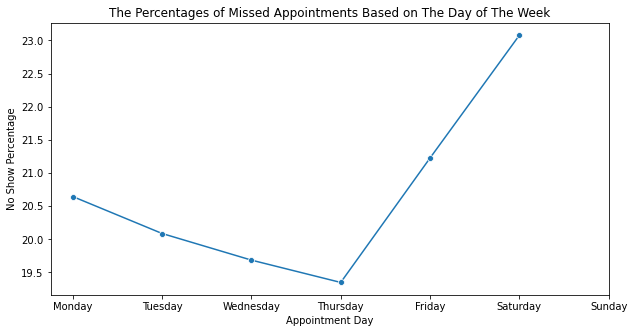

In [39]:
# percentages of no show appointments based on week day
Week_day_percentage_no_show = df.groupby('day_of_week').mean().No_Show * 100
#creating a label for week days
name_of_weekday=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# plot a line plot
plt.figure(figsize = [10, 5])
sns.lineplot(x = Week_day_percentage_no_show.index,  y = Week_day_percentage_no_show,marker = 'o')
plt.title('The Percentages of Missed Appointments Based on The Day of The Week')
plt.xticks(np.linspace(0, 5+1, 7), name_of_weekday)
plt.xlabel('Appointment Day')
plt.ylabel('No Show Percentage');

The percentage of patients who missed their appointments vary as we can see that Thursday had 19.3% which happens to be the least percentage of patients who missed their appointments , a close second is Wednesday with 19.68%. Its pertinent to note that the day with the highest percentage of missed appointments is Saturday with 23.07% which might likely be due to the fact that its a weekend, and a close second is Friday with 21.2%.

**Its quite obvious that to a great deal the day of the week has an effect on missed appointments**

### Research Question 2  (What is the Gender distribution of patients for who missed their appointment !)

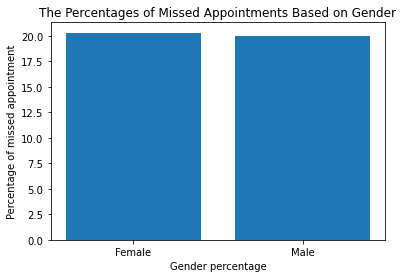

<Figure size 1080x648 with 0 Axes>

In [40]:
# Creating a def function for the graphs
def plot(x, y, x_label, y_label, title,c,d):
    plt.bar( x , y)
    plt.xlabel(x_label )
    plt.ylabel(y_label)
    plt.title( title )
    plt.xticks(c,d)
    plt.figure(figsize = [15, 9])
    plt.show()

# percentages of no show appointments based on week day
Gender_percentage_no_show = df.groupby('Gender').mean().No_Show * 100

# Declaring the variables c and d for the xticks labels in the graph
c = [0,1]
d = ['Female','Male']

# Calling the plot function for the Age distribution graph
plot(Gender_percentage_no_show.index,Gender_percentage_no_show,'Gender percentage','Percentage of missed appointment','The Percentages of Missed Appointments Based on Gender',c,d)


As we can see , there is not much of an obvious difference between both genders which implies that Gender is not much of a deciding factor for missed appointment.

### Research Question 3  (What is the age distribution of patients who missed their appointment !)

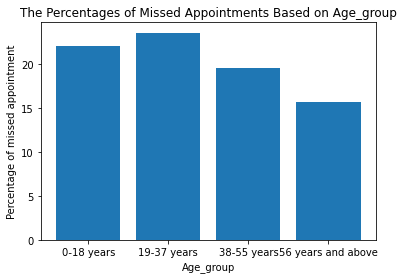

<Figure size 1080x648 with 0 Axes>

In [41]:
# percentages of no show appointments based on week day
Age_group_percentage_no_show = df.groupby('Age_group').mean().No_Show * 100


# Declaring the variables c and d for the xticks labels in the graph
c = [0,1,2,3]
d = ['0-18 years','19-37 years','38-55 years','56 years and above']


# Calling the plot function for the Age distribution graph
plot(Age_group_percentage_no_show.index,Age_group_percentage_no_show,'Age_group','Percentage of missed appointment','The Percentages of Missed Appointments Based on Age_group',c,d)

   

The above distribution shows that the age group with the highest percentage of missed appointment are patients between 19 - 37 years with 23.5% , while the patients from ages 56 and above were the least likely to miss their appointment. This is quite logical as most old persons are more naturally more careful with their health matters than the younger ones due to their frailty of their bodies at that time. Hence is also a deciding factor for missed appointment.

### Research Question 4  (How does the waiting period affect missed appointments !)

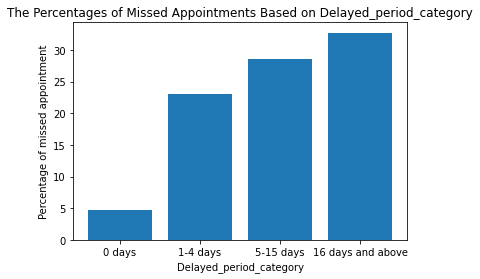

<Figure size 1080x648 with 0 Axes>

In [42]:
# percentages of missed appointments based on waiting period
Delayed_period_category_percentage_no_show = df.groupby('Delayed_period_category').mean().No_Show * 100

# Declaring the variables c and d for the xticks labels in the waiting period graph
c = [0,1,2,3]
d = ['0 days','1-4 days','5-15 days','16 days and above']


# Calling the plot function for the Delayed period category graph
plot(Delayed_period_category_percentage_no_show.index,Delayed_period_category_percentage_no_show,'Delayed_period_category','Percentage of missed appointment','The Percentages of Missed Appointments Based on Delayed_period_category',c,d)


Clearly we can see that most patients that schedule their appointment on the same day they called and the farther the Appointment day is from the scheduled day the more likely it is for the patients to miss their appointments. Those with zero waiting days have only 4.6% of their patients who missed their appointments while those who had appointments scheduled with more than 16 days from the scheduled day had 32.7 % of their patients who missed their appointment. This means to a great deal that waiting days affect the number of missed appointments by patients.

### Research Question 5  (Does the availability of a scholarship affect the No Show appointment !)

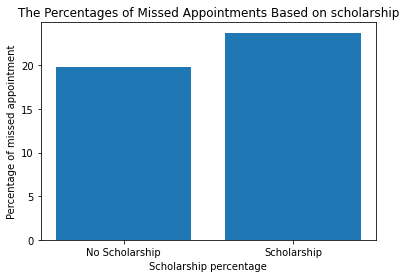

<Figure size 1080x648 with 0 Axes>

In [43]:
# percentages of missed appointments based on waiting period
Scholarship_percentage_no_show = df.groupby('Scholarship').mean().No_Show * 100

# Declaring the variables c and d for the xticks labels in the waiting period graph
c = [0,1]
d = ['No Scholarship','Scholarship']
    
# Calling the plot function for the Scholarship graph
plot(Scholarship_percentage_no_show.index,Scholarship_percentage_no_show,'Scholarship percentage','Percentage of missed appointment','The Percentages of Missed Appointments Based on scholarship',c,d)
   



There is only a slight difference between as we can see that 19.8% of patients who didnt have scholarship missed their appointments while 23.7 % of those who had scholarship missed the appointment, so its not much of a deciding factor.

<a id='conclusions'></a>
## Conclusions

> The dataset I analyzed is an information that contains over 100 thousand medical appointments in Brazil that is focused on whether patients missed their Doctor's appointment or not. The records have **110,527 rows** , **14 columns** with about **79.8 %** of patients who showed up for their Doctors Appointment and **20.2 %** of patients who didnt show up for theirs.

**THE FOLLOWING RESEARCH QUESTIONS WERE ANSWERED BY THE ANALYSIS** <br> <br>
**Q1.Is the day of the week a deciding factor for missed appointments? <br> <br>**
Yes we can observe closely that Saturday has the highest percentage of missed appointments while Wednesday and Thursday had the lowest percentage which implies to a great deal that the day of the week an appointment is scheduled goes a long way in determining whether the patients would make or miss their appointments.

**Q2.Which gender is more likely to meet their appointment schedules? <br> <br>**
Even though we had a higher percentage of percentage of females who missed their appointments, it was pretty close call.Based on this data, Gender is not a deciding factor for missed appointments.

**Q3.What is the age distribution of patients for the Noshow appointment? <br> <br>**
We can see from the data that a majority of those who missed their appointments were under 37 years while most of the aged persons(over 56 years and above) did not miss their Doctor's appointment.


**Q4.Does the waiting period affect missed appointments?<br> <br>**
A notable observation from the data is that most of the patients who called in to scheduled their appointments on the same day did not miss it while those who scheduled theirs by more than 16 days were more likely to miss their appointment.


**Q5.Does the availability of a scholarship affect the No Show appointment?<br> <br>**
The patients with scholarship happen to have a higher percentage of missed appointment (albeit slightly) , implying that scholarship is not a deciding factor for missed appointments. ?<br> <br>
>**This implies that factors such as Waiting period(period between scheduled day and appointment day), age of patients and the day of the week goes a long way in determining the percentage of patients who missed their Doctor's appointment**

Limitations of the dataset <br> <br>
1.The description of some of the column values didnt provide enough information. I had to search google for some of them to get a clear description.<br> <br>

2.The dataset only covers a short period of time and does not provide enough information for the analysis.




**References**  <br> <br>
1.https://stackoverflow.com/questions/30222533/create-a-day-of-week-column-in-a-pandas-dataframe-using-python
2.https://stackoverflow.com/questions/64217172/is-there-better-alternative-to-numpy-arange <br> <br>
3.https://www.statology.org/length-of-values-does-not-match-length-of-index/ <br> <br>
4.https://www.geeksforgeeks.org/lineplot-using-seaborn-in-python/?ref=rp <br> <br>
5.https://github.com/mnalmelihi/udacity-dand-investigate-a-dataset-no-show-appointments/blob/master/investigate-a-dataset.ipynb <br> <br>
6.https://janamalesova.github.io/Udacity-Data-Analyst-Nanodegree/P1/